# Statistical & hypothesis testing on Boston Housing price
**By Vallian Sayoga**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
import numpy as np

In [2]:
sns.set_theme(font='JetBrains Mono')

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


* **CRIM** - per capita crime rate by town
* **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** - proportion of non-retail business acres per town.
* **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* **NOX** - nitric oxides concentration (parts per 10 million)
* **RM** - average number of rooms per dwelling
* **AGE** - proportion of owner-occupied units built prior to 1940
* **DIS** - weighted distances to five Boston employment centres
* **RAD** - index of accessibility to radial highways
* **TAX** - full-value property-tax rate per USD10,000
* **PTRATIO** - pupil-teacher ratio by town
* **LSTAT** - % lower status of the population
* **MEDV** - Median value of owner-occupied homes in $1000's

# Task 1. Median value of owner-occupied homes

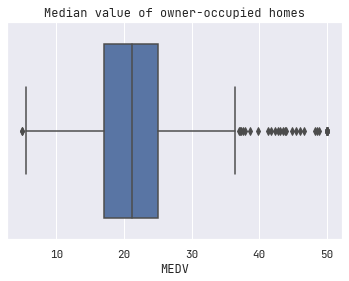

The median is 21.2


In [4]:
sns.boxplot(x=df.MEDV)
plt.title("Median value of owner-occupied homes")
plt.show()

print(f"The median is {df.MEDV.median()}")

# Task 2. Bar plot for the Charles river variable

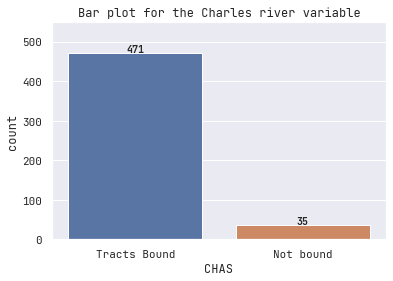

In [5]:
df['CHAS'] = df['CHAS'].astype(int)
CHAS_count = df.CHAS.value_counts()
sns.countplot(x=df['CHAS'])
plt.ylim(0,550)
plt.title("Bar plot for the Charles river variable")

for i, v in CHAS_count.iteritems():
    plt.text(i, v + 10, v, fontdict=dict(horizontalalignment='center', verticalalignment='center', weight='bold'))
# plt.text(1, CHAS_count[1] + 10, CHAS_count[1], fontdict=dict(horizontalalignment='center', verticalalignment='center',))
plt.xticks(np.arange(2), ["Tracts Bound", "Not bound"])
plt.show()

# Task 3. Boxplot for the MEDV variable vs the AGE variable
Comparing between:
* 35 < AGE < 70* AGE <= 35
* 35 < AGE < 70
* AGE >= 70

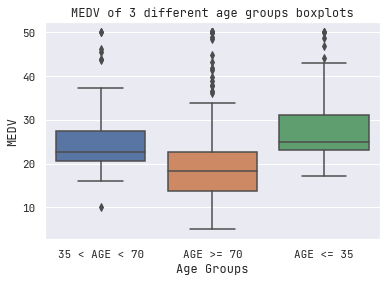

In [25]:
# Let's split the AGE into 3 groups
df.loc[df.AGE <= 35, 'age_group'] = 'AGE <= 35'
df.loc[(df.AGE > 35) & (df.AGE < 70), 'age_group'] = '35 < AGE < 70'
df.loc[df.AGE >= 70, 'age_group'] = 'AGE >= 70'

ax = sns.boxplot(x='age_group', y='MEDV', data=df)
ax.set(title='MEDV of 3 different age groups boxplots', xlabel='Age Groups')
plt.show()

# Task 4. Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

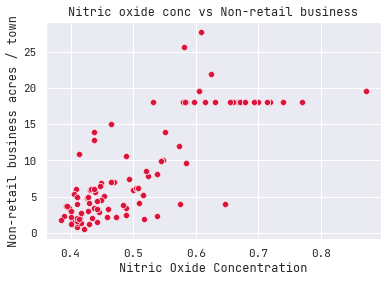

In [6]:
ax = sns.scatterplot(x=df.NOX, y=df.INDUS, color='crimson')
ax.set(
    xlabel="Nitric Oxide Concentration",
    ylabel="Non-retail business acres / town",
    title="Nitric oxide conc vs Non-retail business"
)
plt.show()

It shows positive trend that the higher the NOX, the higher non-retail business

# Task 5. Histogram for the pupil to teacher ratio variable

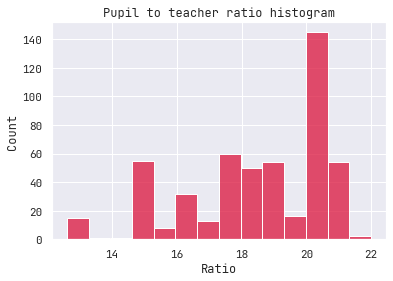

In [7]:
ax = sns.histplot(x=df.PTRATIO, color='crimson')
ax.set(
    title='Pupil to teacher ratio histogram',
    xlabel='Ratio'
)
plt.show()

# Task 6. Is there a significant difference in median value of houses bounded by the Charles river or not?
* T-test for independent samples
* H0: There's no difference in median
* H1: There's a difference in median
* α: 0.05

In [8]:
# Check variance uniformity
_, pvalue = scipy.stats.levene(
    df.loc[df.CHAS == 0, 'MEDV'],
    df.loc[df.CHAS == 1, 'MEDV'],
    center='mean'
)
print(f"There's a difference in variance with pvalue ({pvalue}) < α")

There's a difference in variance with pvalue (0.003238119367639829) < α


In [9]:
_, pvalue = scipy.stats.ttest_ind(
    df.loc[df.CHAS == 0, 'MEDV'],
    df.loc[df.CHAS == 1, 'MEDV'],
    equal_var=False  # Because the variance was not equal based on previous test
)
print(f"H1: There's a difference in median with pvalue ({pvalue}) < α")

H1: There's a difference in median with pvalue (0.003567170098137517) < α


# Task 7. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
* ANOVA
* H0: There's no difference in median for each proportion of owner occupied units built prior to 1940 (AGE < 1940) vs (AGE >= 1940)
* H1: There's a difference in median for each proportion of owner occupied units built prior to 1940
* α: 0.05

Comparing between:
* AGE <= 35
* 35 < AGE < 70
* AGE >= 70

In [28]:
# Let's create the variables
zero_thirtyfive = df.loc[df.AGE <= 35, 'MEDV']
above_thirtyfive_seventy = df.loc[(df.AGE > 35) & (df.AGE < 70), 'MEDV']
above_seventy = df.loc[df.AGE >= 70, 'MEDV']

In [29]:
_, pvalue = scipy.stats.f_oneway(
    zero_thirtyfive,
    above_thirtyfive_seventy,
    above_seventy,
)
print(f"H1: There's a difference in median for each proportion of owner occupied units built prior to 1940 with pvalue ({pvalue}) < α")

H1: There's a difference in median for each proportion of owner occupied units built prior to 1940 with pvalue (1.7105011022702984e-15) < α


# Task 8. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
* PearsonR
* H0: There's no correlation between NOX & non retail business
* H1: There's a correlation between NOX & non retail business
* α: 0.05

In [12]:
x = df['NOX']
y = df['INDUS']
scipy.stats.pearsonr(x, y)
print(f"H1: There's a correlation between NOX & non retail business with pvalue ({pvalue}) < α")

H1: There's a correlation between NOX & non retail business with pvalue (1.7105011022702984e-15) < α


# Task 9. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
* Regression
* H0: an additional DIS has no impact on MEDV
* H1: an additional DIS has impact on MEDV
* α: 0.05

In [13]:
x = df['DIS']
x = sm.add_constant(x)
y = df['MEDV']

model = sm.OLS(y, x).fit()
prediction = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 16 May 2022   Prob (F-statistic):           1.21e-08
Time:                        10:56:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* H1: an additional DIS has impact on MEDV with pvalue (0.000) < α
* an additional `DIS` affects 1.0916 more values on `MEDV`